# **LASSO variable selection**

Maintainer: Zhaohu(Jonathan) Fan. Contact him at (psujohnny@gmail.com)

Note: This lab note is still WIP, let us know if you encounter bugs or issues.
### Ridge Regression
### Lasso Regression
### Elastic Net Regression



#### *Colab Notebook [Open in Colab](https://colab.research.google.com/drive/1QPxdVwSYKXM9l-Qf0EsYVZbeLjJWX5OV?usp=sharing)*
#### *Useful information about [LASSO variable selection in R](https://yanyudm.github.io/Data-Mining-R/lecture/3.C_LASSO.html)*
#### *Useful information about [LASSO+Ruilt-in Python dataset](https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/)*





## 2 Boston Housing Data

Boston housing data is a built-in dataset in sklearn datasets package, so you do not need to download externally.

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install visualpython

### 2.1 Load Data


In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Updating the columns list to match the data
boston = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston['MEDV'] = target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2.3 Preparation

#### 2.3.1 Splitting data to training and testing samples
Next we sample 80% of the original data and use it as the training set. The remaining 20% is used as test set. The regression model will be built on the training set and future performance of your model will be evaluated with the test set.

In [11]:
from sklearn.model_selection import train_test_split
from random import sample
import random
random.seed(1234)

In [13]:
#for statmodels smf function (explained in Model Building section)
num = list(range(len(boston)))
ran = sample(num, int(len(num)*0.8))
rem = [i for i in num if i not in ran]

boston_train = boston.iloc[ran, :]
boston_test = boston.iloc[rem, :]

X_train = boston_train.iloc[:,:-1]
y_train = boston_train.iloc[:,-1:]

X_test = boston_test.iloc[:,:-1]
y_test = boston_test.iloc[:,-1:]


In [15]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
# Train the model
#alpha = 1
model_lasso = Lasso(alpha = 1).fit(X_train, y_train['MEDV'])

print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
round(coef,2)



The variable coefficients provided by the lasso are:


CRIM      -0.07
ZN         0.05
INDUS     -0.00
CHAS       0.00
NOX        0.00
RM         1.08
AGE        0.02
DIS       -0.83
RAD        0.27
TAX       -0.01
PTRATIO   -0.63
B          0.01
LSTAT     -0.79
dtype: float64

In [17]:
#alpha = 0.5
model_lasso = Lasso(alpha = 0.5).fit(X_train, y_train['MEDV'])
print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
round(coef,2)

The variable coefficients provided by the lasso are:


CRIM      -0.09
ZN         0.05
INDUS     -0.00
CHAS       0.00
NOX        0.00
RM         2.58
AGE        0.00
DIS       -1.09
RAD        0.29
TAX       -0.01
PTRATIO   -0.68
B          0.01
LSTAT     -0.69
dtype: float64

Computing regularization path using the LARS ...
.

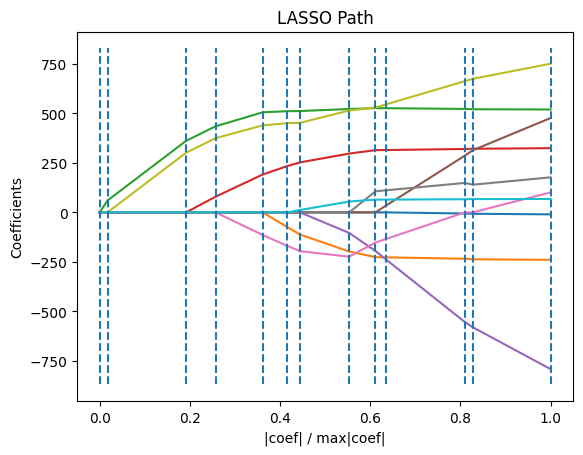

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

[Tuning Lasso Hyperparameters] (https://machinelearningmastery.com/lasso-regression-with-python/)

- How do we know that the default hyperparameter of alpha=1.0 is appropriate for our dataset? We don’t.


- One approach would be to gird search alpha values from perhaps 1e-5 to 100 on a log-10 scale and discover what works best for a dataset. Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01. We will try the latter in this case.



In [22]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train['MEDV'])
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.540
Config: {'alpha': 0.02}


In [ ]:
#use 5-fold cross validation to pick lambda
from sklearn.linear_model import LassoCV
model_lassocv = LassoCV(cv = 5).fit(X_train, y_train['MEDV'])
print('The variable coefficients provided by the lasso are:')
coef = pd.Series(model_lassocv.coef_, index = X_train.columns)
round(coef,2)

In [ ]:
print("LassoCV picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


In [ ]:
print("The chosen alpha is: ")
round(model_lassocv.alpha_,2)

In [ ]:
print("Chosen model's R Squared: ")
round(model_lassocv.score(X_train, y_train),2)

In [ ]:
test_pred = model_lassocv.predict(X_test)
test_error = y_test['MEDV'] - test_pred
test_MSE = (test_error*test_error).mean()
round(test_MSE,2)

In [ ]:
%%shell
jupyter nbconvert --to html ///content/3_C_LASSO_variable_selection.ipynb